# Session 5 Exercises

These are the exercises from the session 5 notes

In [2]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Matrix approach to boundary value problems

### In-class

1. You will construct the matrix $M$ for the bar with uniform cross-section, using the `np.diag` function. If you pass a 1D array to `np.diag` then it will return a 2D array with the 1D array along the diagonal. You can also specify a shifted diagonal (consider the diagonals in the matrix with 1 instead of -2) using `np.diag(array,k=n)` where `n` can be positive or negative.

    1. Define a variable for your problem size, $N$, and create an array of length $N$ with every element set to -2.
	2. Create an array of length $N-1$ with every element set to 1 (remember the command `np.ones`)
	3. Create the matrix by summing together the result of *three* calls to `np.diag` and print it out. Your matrix should look something like this (example for $N=7$):

`[[-2.  1.  0.  0.  0.  0.  0.]
  [ 1. -2.  1.  0.  0.  0.  0.]
  [ 0.  1. -2.  1.  0.  0.  0.]
  [ 0.  0.  1. -2.  1.  0.  0.]
  [ 0.  0.  0.  1. -2.  1.  0.]
  [ 0.  0.  0.  0.  1. -2.  1.]
  [ 0.  0.  0.  0.  0.  1. -2.]]`

In [41]:
N = 7
main_diag = np.ones(N)*-2
off_diag = np.ones(N-1)

arr = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
print(arr)

[[-2.  1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  1. -2.]]


2. Use `np.linalg.inv` to invert the matrix and solve for the temperature, with boundary conditions $\theta(x)$ for $\theta(x=0)=500K$ and $\theta(x=1)=300K$, using `np.dot(Minv,b)`. Plot the result (including the end-points). Note that we assume that the bar is 1m long.

[[-0.875 -0.75  -0.625 -0.5   -0.375 -0.25  -0.125]
 [-0.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25 ]
 [-0.625 -1.25  -1.875 -1.5   -1.125 -0.75  -0.375]
 [-0.5   -1.    -1.5   -2.    -1.5   -1.    -0.5  ]
 [-0.375 -0.75  -1.125 -1.5   -1.875 -1.25  -0.625]
 [-0.25  -0.5   -0.75  -1.    -1.25  -1.5   -0.75 ]
 [-0.125 -0.25  -0.375 -0.5   -0.625 -0.75  -0.875]]


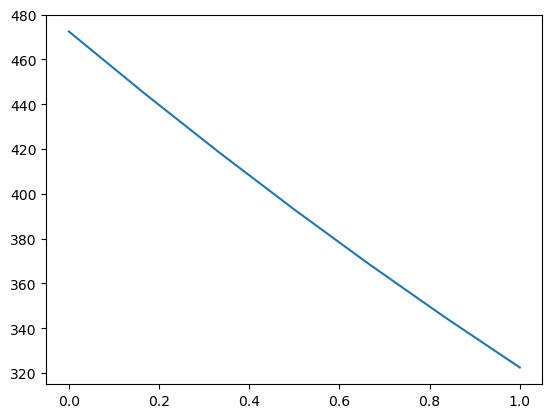

In [43]:
Minv = np.linalg.inv(arr)
print(Minv)

b = np.ones(N)
b[0] = -500
b[-1] = -300

T = np.dot(Minv, b)

x = np.linspace(0,1,N)
plt.plot(x, T)

### Further work

1. Now consider a bar which has cross-sectional area $\pi(2-x)^2/10,000$. Write a function that returns the area for an input of $x$.

2. Construct a matrix for the varying cross-section, following these steps, which are an adaptation of the method we used above:

	1. Start as you did before with a size, $N$
	2. Define $\Delta x=1/(N+1)$ for a bar of length 1m.
	3. For the main diagonal, you will need to create an array whose entries are $-A(x_i)-A(x_{i+1})$, where $x_i=i\Delta x$ and $i$ starts at zero.
	4. For the shifted diagonals you can use one array, $A(x_i)$ with $i$ starting from one (note that this will still give the correct entries)
	5. Now build the matrix using `np.diag`. Print your matrix to check that it is symmetrical (you may find `np.set_printoptions(precision=5)` helpful)
	6. Now solve for the temperature, setting the boundary conditions as $-500A(0)$ and $-300A(1.0-\Delta x)$. Plot your result, with the boundary conditions, and ensure that there are no discontinuities.

## 5. Parabolic equations

### In-class

1. Write a function to perform the step-by-step update (not the matrix version) based on forward differences in time. You should pass as parameters an array of temperatures at timestep $n$ only (i.e. a 1D array) and the constant `zeta`. Return an array of temperatures at timestep $n+1$. When you iterate along the bar, remember to exclude the end-points. (You may find `np.size` useful to determine the iteration.)

In [111]:
def step(arr):
    res = np.zeros(len(arr))
    res[0] = arr[0]
    for i in range(1, len(arr)-1):
        res[i] = zeta*(arr[i+1]+arr[i-1]) + (1-2*zeta)*arr[i]
    return res


2. Create a 2D array to store the temperature; don’t make the spatial domain too large (I chose 7 points) and use 10 time points. Set the boundary conditions ($\theta=300K$ at $t=0$ for all points, except $\theta_{0,0}=500K$). Define a parameter zeta (start with 0.1) and loop over time, calling the update routine to evolve the differential equation forward in time. Ensure that you set the boundary conditions at each step if necessary. (Remember that, if you have an array `temperature[N,I]` with `I` spatial points and `N` time points then `temperature[n]` will give a 1D array with all points along the bar at timestep `n`. You can also store a 1D array in your 2D array using something like `temperature[n] = array`.)

[[500.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]]
[[5.00000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 5.00000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 9.00000000e+01 5.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 1.22500000e+02 1.30000000e+01 5.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 1.49300000e+02 2.27000000e+01 1.70000000e+00
  5.00000000e-02 0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 1.71710000e+02 3.32600000e+01 3.63500000e+00
  2.100

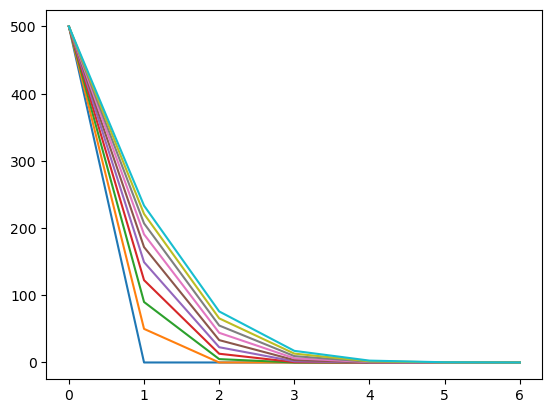

In [113]:
zeta = 0.1
T = np.zeros((10, 7))
T[:,0] = 300
T[0,0] = 500

print(T)

for n in range(len(T)-1):
    T[n+1] = step(T[n])

print(T)

for i in range(len(T)):
    plt.plot(T[i])

3.	Plot the resulting evolution of the temperature distribution (you could loop over time steps and put them all on the same graph using `plt.plot` or you create an array of plots using the figure approach).

In [ ]:
# done above

4.	Now repeat the calculation for `zeta=0.7`. What happens? If you have time, identify a critical value of `zeta`.

[[500.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]
 [300.   0.   0.   0.   0.   0.   0.]]
[[  500.            0.            0.            0.            0.
      0.            0.       ]
 [  500.          350.            0.            0.            0.
      0.            0.       ]
 [  500.          210.          245.            0.            0.
      0.            0.       ]
 [  500.          437.5          49.          171.5           0.
      0.            0.       ]
 [  500.          209.3         406.7         -34.3         120.05
      0.            0.       ]
 [  500.          550.97        -40.18        382.445       -72.03
     84.035         0.       ]
 [  500.          101.486       669.462

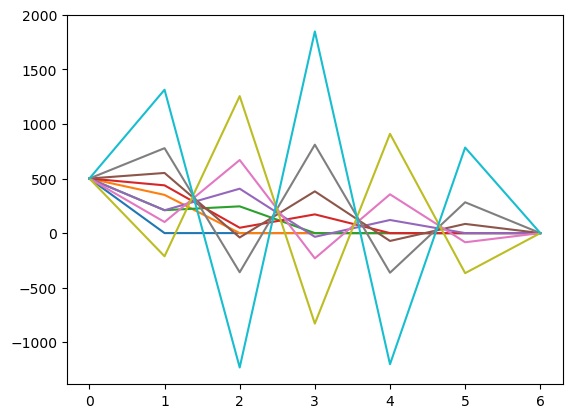

In [114]:
zeta = 0.7
T2 = np.zeros((10, 7))
T2[:,0] = 300
T2[0,0] = 500

print(T2)

for n in range(len(T2)-1):
    T2[n+1] = step(T2[n])

print(T2)

for i in range(len(T2)):
    plt.plot(T2[i])

### Further work

1. Write two functions to create the matrices $\mathbf{M}$ and $\mathbf{N}$. You should pass as parameters the dimensions of the problem (remember that for $N$ points your matrices should have size $(N-2\times N-2)$) and $\zeta$ (zeta) and return the matrix. You can use the same approach using `np.diag` as we did above.

2. Now solve the same problem as we did in Question 2 of the in-class work, and experiment with the value of $\zeta$. You should ask yourself two questions: 1. Is the approach stable for all values of $\zeta$? 2. How does the long-time solution vary with $\zeta$? You may need to change the number of steps you use with smaller values of $\zeta$.

## 6. Elliptic equations: iterative approaches

### In-class

1. Adapt the basic Jacobi solver below to implement first the Gauss-Seidel solver, and then the SOR solver with Gauss-Seidel. For the SOR method you should pass $\omega$ as a parameter.

In [144]:
def update_phi(phi, N):
    """Update NxN grid of phi using Jacobi method"""
    # Copy rather than equate to avoid update issues
    phiout = np.copy(phi)
    # Avoid boundaries in update
    for i in range(1,N-1):
        for j in range(1,N-1):
            phiout[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] 
                              + phi[i,j-1] + phi[i,j+1])
    return phiout

def gauss_seidel(phi, N):
    """Update NxN grid of phi using Jacobi method"""
    # Avoid boundaries in update
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] 
                           + phi[i,j-1] + phi[i,j+1])
    return phi


def SOR(phi, N, omega):
    """Update NxN grid of phi using Jacobi method"""
    # Copy rather than equate to avoid update issues
    phiout = np.copy(phi)
    # Avoid boundaries in update
    for i in range(1,N-1):
        for j in range(1,N-1):
            phiout[i,j] = 0.25*omega*(phi[i-1,j] + phi[i+1,j] 
            + phi[i,j-1] + phi[i,j+1]) + (1-omega)*phi[i,j]
    return phiout

2. We will solve for the electrostatic potential in a square, with the potential fixed at 3V on the $x$ boundaries and 4V on the $y$ boundaries.  Set up an $(N\times N)$ grid for $\phi$ (where N is a variable that you can adjust) which will include the boundaries. Set the initial values of $\phi$ to include the boundary conditions (3V for x and 4V for y) with $\phi=0$ elsewhere. Using a while loop, iterate using the Gauss-Seidel method to find a solution for $\phi$ (you should calculate the maximum change in any element of $\phi$ from step to step using `np.max` and `np.abs`). Keep a record of the number of iterations, and output it at the end.

In [146]:
pot = np.zeros((100,100))
pot[0] = 4
pot[-1] = 4

pot[:,0] = 3
pot[:,-1] = 3

results = []
i = 1
maximum = 10
while maximum > 0.01:
    pot1 = np.copy(pot)
    pot = gauss_seidel(pot, 500)
    maximum = np.max(np.abs(pot1-pot))
    i+=1

print("maximum", maximum)
print("number", i)

IndexError: index 100 is out of bounds for axis 1 with size 100

3.	Plot the resulting potential using `plt.imshow` and/or `plt.contourf`. With `imshow` you might experiment with interpolation (add the argument `interpolation='bicubic` for instance), and compare to a solution using larger numbers of points. With `contourf`, remember that you can pass an array of contour values to use.  (You can also add contours to an `imshow` plot using `contour` though you might need to set the colour of the contours using `colors='white'` or some other suitable colour to make them visible.)

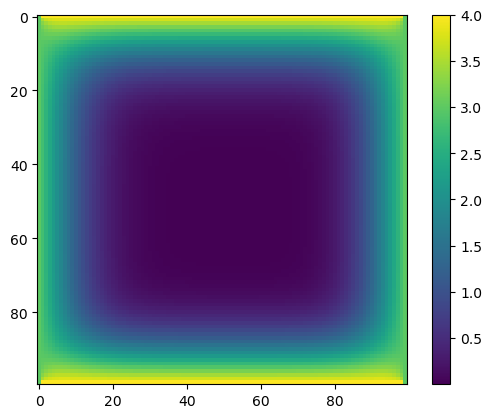

In [142]:
plt.imshow(pot)
plt.colorbar()

### Further work

1. Now use the SOR method for values of $\omega$ between 0.1 and 0.9, and find the most efficient value.

## 7. Supplementary: elliptic equations: matrix approaches

Note that we are not covering this in detail in class; it's important to know that these methods exist if you continue in computational physics, and tackling these problems will deepen your understanding.  However, the material is challenging, mainly because of indexing issues, and is labelled as supplementary.

### In-class

1. The functions from the notes to convert between the 2D and 1D representations are given below. Now write a function to calculate the Laplacian matrix and the boundary condition vector, using the following steps:

	1. Pass as parameters *either* $N_x$ or $N$ and the boundary conditions for both $x$ and $y$ (in this case 3V for $x$ and 4V for $y$). You will need to calculate whichever of the two sizes you did not pass.
	1. The matrix can be built using `np.diag`. The main diagonal (where $i=j$) should be made from an array of length $N$, containing entries of -4
	1. There are then *four* other sub-diagonals (based on the terms $\phi_{i+1,j}$ etc). For the $j+1$ and $j-1$ sub-diagonals you need arrays with entries 1 with a location of $\pm N_x$ (use the parameter `k` when calling `np.diag` to shift the location) and a length of $N-N_x$. For the $i+1$ and $i-1$ sub-diagonals you need a location of $\pm 1$ and a length of $N-1$; the array should be set to 1 except for the elements $a\times N_x-1$ where $a=1\rightarrow N_x-1$, which should be zero
	1. Now make the boundary condition vector: loop over $N$ entries, use the functions above to find $i$ and $j$ and accumulate the boundary conditions if $i$ or $j$ is $0$ or $N_x-1$. (You need to add in the value $b_x$ (the x boundary condition) for $i$ and $b_y$ for $j$; check you understand why.)

In [ ]:
def ij_to_index(i,j,N):
    """Convert i,j pair in (NxN) grid to index"""
    return i+j*N

from math import floor
def index_to_ij(index,N):
    """Convert index to i,j pair in (NxN) grid"""
    j = floor(index/N)
    i = index - j*N
    return i,j

2.	Now solve for the potential, using `np.linalg.inv` and `np.dot`, or `np.linalg.solve` to solve the appropriate equation. You will need to reshape the resulting 1D vector into a grid (use `np.reshape(potential,(Nx,Ny)))` and plot using `plt.imshow`. You may find the optional parameter `interpolation=’bicubic’` makes the very blocky result clearer.

### Further work

1.	Create a Jacobi or Gauss-Seidel solver for the electrostatic grid problem above, and check that the results match the exact inversion. You will need to define a tolerance and stop when the change in the solution (defined in some way - maybe the RMS change between iterations) is smaller than this. You might like to increase the size of the grid, and see whether the numerical cost becomes noticeable for both matrix inversion and the iterative method.